# Introduction

How much AirBNB homes are earning in certain time frames?<br>
The longer you run, the better review score you get?<br>
What are the most important factors in determining the price?

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [2]:
#load csv file into dataframe
df_listings = pd.read_csv("listings.csv")
df_reviews = pd.read_csv("reviews.csv")
df_calendar = pd.read_csv("calendar.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df_listings['host_neighbourhood'].value_counts()

Capitol Hill     405
Belltown         254
Ballard          210
Minor            191
Queen Anne       189
                ... 
Pinehurst          1
Kauaʻi             1
Long Beach         1
Waianae Coast      1
Beverly Hills      1
Name: host_neighbourhood, Length: 102, dtype: int64

In [5]:
#check 5 rows of listings
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [6]:
#check quantitative variables 
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
#check if all data types are correct
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
#check null for price when availability is true
df_calendar[df_calendar.available == "t"].price.isnull().sum()

0

In [10]:
df_calendar.date = pd.to_datetime(df_calendar.date)

In [11]:
def price_to_int(arr):
    return arr.apply(lambda x: int(x[1:-3].replace(",","")))

In [12]:
#All the price are in $XXX.XX string format so we need to remove special character and cast it as int
df_calendar.price = price_to_int(df_calendar[df_calendar.available == "t"].price)

In [13]:
price_by_month = df_calendar.price.groupby(df_calendar.date.dt.strftime('%m')).mean().sort_values()

In [14]:
def plot_bar(x_value, y_value, xlabel = "", ylabel = "", title = ""):
    """
    plot the bar chart
    """
    plt.bar(x_value, y_value)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

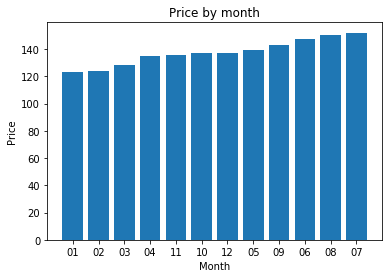

In [15]:
#Plot price by month
plot_bar(price_by_month.index, price_by_month.values,\
         xlabel = "Month", ylabel = "Price", title = "Price by month")

### The longer you run, the better review score you get?

In [16]:
#change string to datetime format
df_listings.host_since = pd.to_datetime(df_listings.host_since)

In [17]:
#Group review rating median by year
median_review_score_by_year = df_listings.review_scores_rating.groupby\
(df_listings.host_since.dt.strftime('%Y')).median()
median_review_score_by_year

host_since
2008    92.0
2009    95.0
2010    96.0
2011    95.0
2012    96.0
2013    96.0
2014    97.0
2015    97.0
2016     NaN
Name: review_scores_rating, dtype: float64

In [18]:
#Check review scores for 2016
df_listings[df_listings.host_since >= "2016"].review_scores_rating

53     NaN
1983   NaN
2893   NaN
2955   NaN
3106   NaN
Name: review_scores_rating, dtype: float64

Since all number are NaN value so we can drop them and see just the median review score from 2008 to 2015

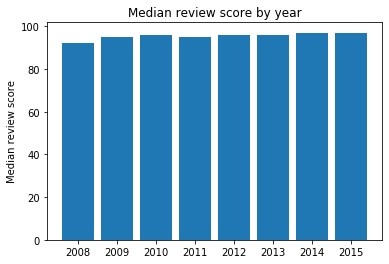

In [19]:
#Plot review scores by year
plot_bar(median_review_score_by_year.index[:-1], median_review_score_by_year.values[:-1],\
         ylabel = "Median review score", title = "Median review score by year")

id	listing_url	scrape_id	last_scraped	name	summary	space	description	experiences_offered	neighborhood_overview	notes	transit	thumbnail_url	medium_url	picture_url	xl_picture_url	host_id	host_url	host_name	host_since	host_location	host_about host_thumbnail_url	host_picture_url host_verifications	street city	state	zipcode	market	smart_location	country_code	country	latitude	longitude	is_location_exact amenities	weekly_price	monthly_price	security_deposit

In [20]:
['square_feet', 'minimum_nights',\
                 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365',\
'host_response_time', 'host_response_rate', 'host_acceptance_rate',\
'require_guest_profile_picture','require_guest_phone_verification',\
                'host_identity_verified','host_has_profile_pic','review_scores_location','review_scores_checkin',
'review_scores_accuracy', 'number_of_reviews'];

In [21]:
#Explanatory Variables
X = df_listings[['host_is_superhost','review_scores_rating', \
                 'host_neighbourhood', 'property_type', 'room_type', 'bedrooms', 'bathrooms',\
                 'beds', 'extra_people', 'bed_type', 'accommodates', \
                 'security_deposit', 'guests_included','cleaning_fee',\
                 'cancellation_policy', 'reviews_per_month']]
#Response Variables
y = df_listings['price']

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_is_superhost     3816 non-null   object 
 1   review_scores_rating  3171 non-null   float64
 2   host_neighbourhood    3518 non-null   object 
 3   property_type         3817 non-null   object 
 4   room_type             3818 non-null   object 
 5   bedrooms              3812 non-null   float64
 6   bathrooms             3802 non-null   float64
 7   beds                  3817 non-null   float64
 8   extra_people          3818 non-null   object 
 9   bed_type              3818 non-null   object 
 10  accommodates          3818 non-null   int64  
 11  security_deposit      1866 non-null   object 
 12  guests_included       3818 non-null   int64  
 13  cleaning_fee          2788 non-null   object 
 14  cancellation_policy   3818 non-null   object 
 15  reviews_per_month    

In [23]:
#percentage is in string format and we need to change it to float
#X.host_response_rate = X.host_response_rate.str.strip("%").astype(float)
#X.host_acceptance_rate = X.host_acceptance_rate.str.strip("%").astype(float)
#All the price are in $XXX.XX string format so we need to remove special character and cast it as int
for var in ['security_deposit', 'cleaning_fee', 'extra_people']:
    X[var] = price_to_int(X[var][X[var].notnull()])
y = price_to_int(y)

/Users/andykwok/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#Create dummy variables for categorical data
X = pd.get_dummies(X, dummy_na = False, drop_first = True)
#Replace null numeric variables value using mean value as a quick fix
X_numeric = X.select_dtypes(['int', 'float64'])
X[X_numeric.columns] = X_numeric.apply(lambda x: x.fillna(x.mean()))

# Modeling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
#Instantiate linear model
lm = LinearRegression(normalize = True)
lm = lm.fit(X_train, y_train)

In [27]:
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

-8.170734897923724e+26

In [28]:
cutoffs = [3500, 2500, 1000, 100, 50, 30, 25, 15, 5, 2]

In [29]:
def build_linear_model(X, y):
    #Instantiate linear model
    lm = LinearRegression(normalize = True)
    lm.fit(X, y)
    return lm

In [30]:
def build_optimal_linear_model(X, y, cut_offs, test_size = 0.30, random_state = 42):
    
    r2_score_dict = {}
    r2_score_list = []
    
    for cut_off in cut_offs:
        reduced_X = X.iloc[:, np.where((np.sum(X) > cut_off) == True)[0]]
        X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.30, random_state=42)
        lm_model = build_linear_model(X_train, y_train)
        y_preds = lm_model.predict(X_test)
        r2_score_test = r2_score(y_test, y_preds)
        r2_score_dict[str(cut_off)] = r2_score_test
        r2_score_list.append(r2_score_test)
    
    optimised_cutoff_val = max(r2_score_dict, key=r2_score_dict.get)
    
    reduced_X = X.iloc[:, np.where((np.sum(X) > int(optimised_cutoff_val)) == True)[0]]
    X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.30, random_state=42)
    lm_model = build_linear_model(X_train, y_train)
    r2_score_test = r2_score(y_test, y_preds)
    return X_train, X_test, y_train, y_test, r2_score_test, lm_model

In [31]:
X_train, X_test, y_train, y_test, r2_score_test, lm_model = build_optimal_linear_model(X, y, cutoffs)

In [32]:
r2_score_test

0.6036821291331043

In [33]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.abs(lm_model.coef_)),pd.DataFrame(lm_model.coef_)], axis=1)
coefficients.columns = ['var', 'abs_coef', 'coef']
coefficients.sort_values(by=['abs_coef'], ascending=False)[:15]

,var,abs_coef,coef
84,property_type_Boat,107.639516,107.639516
39,host_neighbourhood_Hollywood,72.477994,72.477994
94,room_type_Shared room,71.297974,-71.297974
87,property_type_Camper/RV,66.378786,66.378786
62,host_neighbourhood_Portage Bay,60.905874,60.905874
33,host_neighbourhood_Haller Lake,58.945838,-58.945838
22,host_neighbourhood_Crown Hill,54.008815,-54.008815
61,host_neighbourhood_Pioneer Square,51.923996,51.923996
70,host_neighbourhood_South Delridge,51.215540,-51.215540
72,host_neighbourhood_South Park,49.909381,-49.909381
